In [2]:
import drops, utilities, wave_reflection
from scipy.optimize import fsolve
%matplotlib inline

In [135]:
t = linspace(0, 100, 1000)

soln, impacts = drops.ode_standalone(t)

In [132]:
x = soln[:, 0, 0]
y = soln[:, 0, 1]
z = soln[:, 0, 2]

utilities.plot_path(soln)


In [158]:
utilities.wave_field(30, impacts[:1], resolution=5)
plt.show()

In [420]:
impact = drops.Impact(0, -65, -30, 1)
point = (-70, -30)


# solutions should be -.6969, 7.969,   and 6.5122,   -4.6465, per sympy. 
# Your eqs are right, so wtf?

drops.find_wall_collision(impact, point)


-69.8283610004 -30.0
5.11817039724


In [419]:
from numpy import arctan2

s = sqrt(2)/2

xi, yi = -s, s
xw, yw = -s, -s
xp, yp = .5, .5


# θiw = arctan2(yw - yi, xw - xi)  # angle from impact to wall
θiw = arctan2(yw - yi, xw - xi) % τ  # angle from impact to wall
θw = arctan2(yw, xw) % τ # normal to the wall


θwp = (2 * θw - θiw + τ/2) % τ # bounce angle
θwp = ((2 * θw - θiw) + τ/2) % τ # bounce angle  # tdo 

print(θiw/τ, θw/τ, θwp/τ,  sep='\n')

0.75
0.625
0.0


array([ 3.1528])

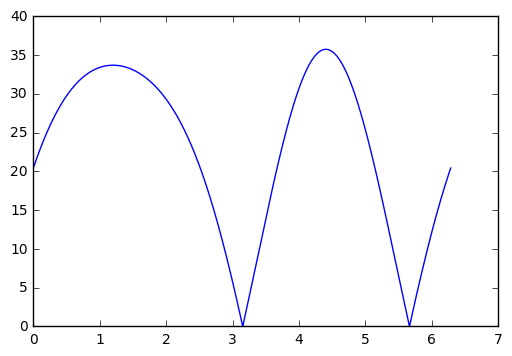

In [50]:
center = drops.Point(0, 0)

# This will cause 4 solutions!
# sample = drops.Point(-30, 0)
# impact = drops.Point(50, 9)

sample = drops.Point(-40, 0)
impact = drops.Point(6.6, 10)

θ = linspace(0, τ, 30000)

cast = partial(wave_reflection.cast_ray, impact, sample, center)

dists = array(list(map(cast, θ)))
plt.plot(θ, dists)

cast2 = partial(wave_reflection.cast_ray_fsolvable, impact, sample, center)
fsolve(cast2, 4)




In [73]:
sample = array([-4, 0])
impact = array([6.6, 1])

list(wave_reflection.find_reflection_points(impact, sample))

UntypedAttributeError: Failed at nopython (nopython frontend)
Failed at nopython (nopython frontend)
Unknown attribute 'ndarray' of type Module(<module 'numpy' from 'C:\\Users\\david\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>)
File "wave_reflection.py", line 53
[1] During: typing of get attribute at C:\Users\david\code\quantum\wave_reflection.py (53)
[2] During: resolving callee type: type(CPUDispatcher(<function simple_collision at 0x00000225088BABF8>))
[3] During: typing of call at C:\Users\david\code\quantum\wave_reflection.py (67)

In [70]:
impacts = [drops.Impact(0, 0, 0, 1)]
#            drops.Impact(10, 100, 105, 1)]

utilities.wave_field(10, impacts)

Impact(t=0, x=0, y=0, F=1) (0.0, 0.0)


PicklingError: Failed at nopython (nopython mode backend)
Can't pickle <class 'drops.Point'>: it's not the same object as drops.Point